# Matrix Profile + FLUSS Testing

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import os
from claspy.segmentation import BinaryClaSPSegmentation



search for the training data and return a sorted list for the filepaths

In [2]:
datalist = []

# Searching for training data within the dataset folder
for file in os.listdir("../dataset/train/"):
    if file.endswith(".csv"):
        datalist.append(os.path.join("../dataset/train/", file))

# Sort the training data and labels
datalist = sorted(datalist, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))
labeldir = "../dataset/train_labels.csv"

# Print the sorted filepath to the training data
print(datalist)

['../dataset/train/1.csv', '../dataset/train/2.csv', '../dataset/train/3.csv', '../dataset/train/4.csv', '../dataset/train/5.csv', '../dataset/train/6.csv', '../dataset/train/7.csv', '../dataset/train/8.csv', '../dataset/train/9.csv', '../dataset/train/10.csv', '../dataset/train/11.csv', '../dataset/train/12.csv', '../dataset/train/13.csv', '../dataset/train/14.csv', '../dataset/train/15.csv', '../dataset/train/16.csv', '../dataset/train/17.csv', '../dataset/train/18.csv', '../dataset/train/19.csv', '../dataset/train/20.csv', '../dataset/train/21.csv', '../dataset/train/22.csv', '../dataset/train/23.csv', '../dataset/train/24.csv', '../dataset/train/25.csv', '../dataset/train/26.csv', '../dataset/train/27.csv', '../dataset/train/28.csv', '../dataset/train/29.csv', '../dataset/train/30.csv', '../dataset/train/31.csv', '../dataset/train/32.csv', '../dataset/train/33.csv', '../dataset/train/34.csv', '../dataset/train/35.csv', '../dataset/train/36.csv', '../dataset/train/37.csv', '../datas

In [85]:
idx_data = 168
data = pd.read_csv(datalist[idx_data])

longitude = data['Longitude (deg)']
inclination = data['Inclination (deg)']

In [86]:
# Load label data
node_label_all = pd.read_csv(labeldir)
# Extract the label for a single object ID
node_label = node_label_all.loc[node_label_all['ObjectID'] == idx_data+1].reset_index()
node_label

,index,ObjectID,TimeIndex,Direction,Node,Type
0,1081,169,0,EW,SS,CK
1,1082,169,0,NS,SS,CK
2,1083,169,1837,EW,ID,NK
3,1084,169,1837,NS,ID,NK
4,1085,169,2171,ES,ES,ES


In [88]:
df = data[["Eccentricity", 'Altitude (m)', 'Inclination (deg)', 'Longitude (deg)']]


We will then visualize the data and label the data with the node labels.

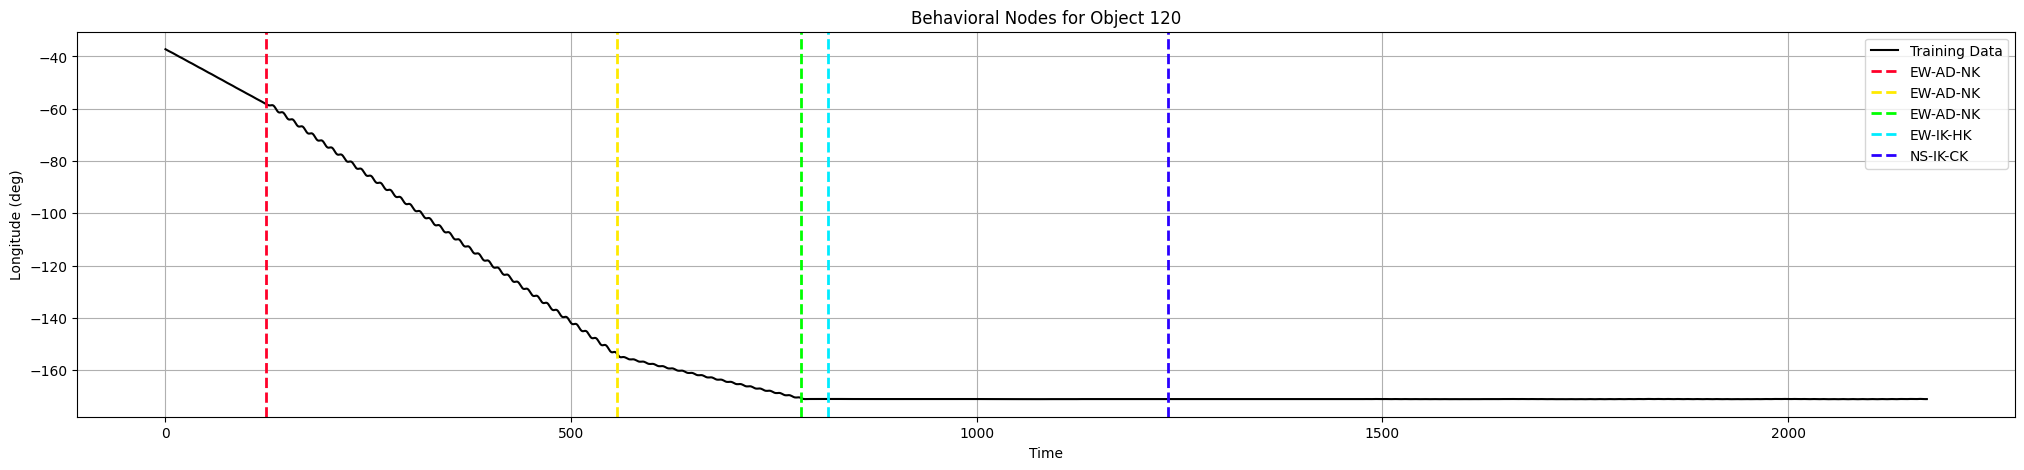

In [65]:
fig = plt.figure(figsize=(25, 5))
cm = plt.get_cmap('gist_rainbow')
plt.plot(data.index, data['Longitude (deg)'], color = 'k', label='Training Data')
for ik in range(len(node_label)-3):
    if node_label["Direction"][ik+2] == 'EW':
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='EW-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
    else:
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='NS-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
plt.title('Behavioral Nodes for Object ' + str(idx_data))
plt.xlabel('Time')
plt.ylabel('Longitude (deg)')
plt.legend()
plt.grid()
plt.show()

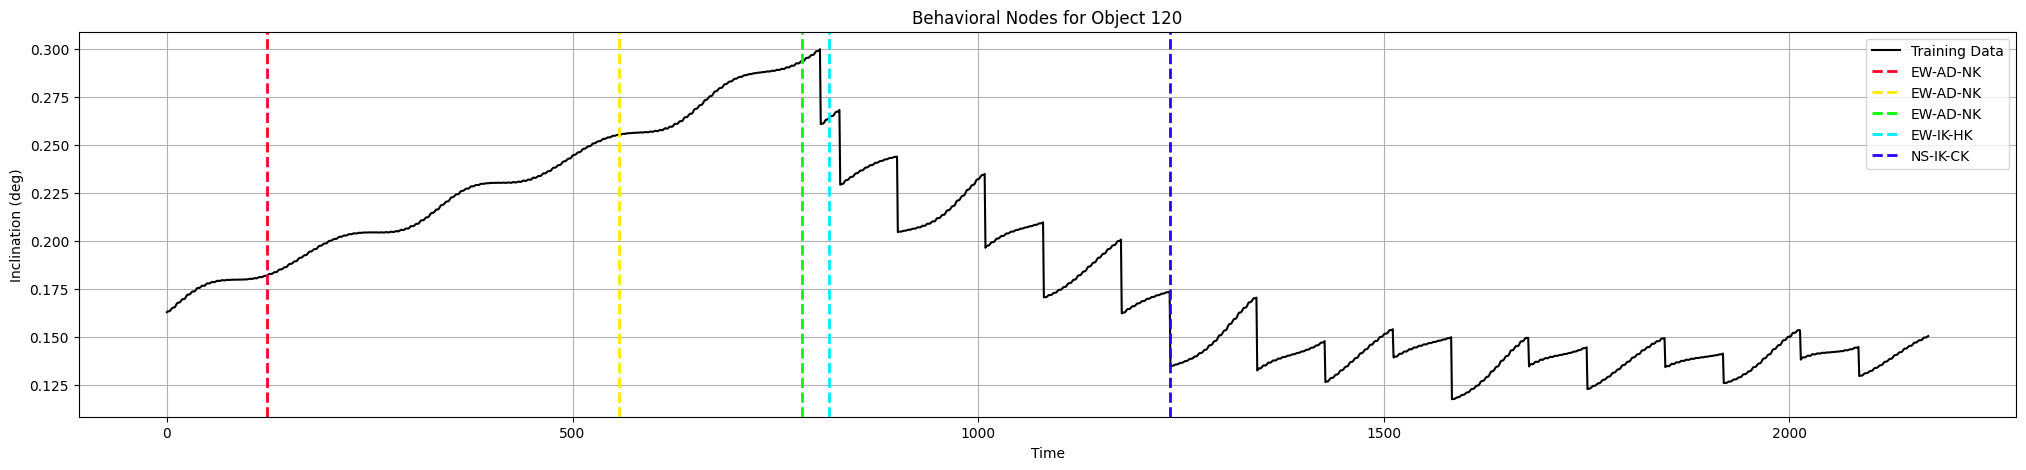

In [80]:
fig = plt.figure(figsize=(25, 5))
cm = plt.get_cmap('gist_rainbow')
plt.plot(data.index, data['Inclination (deg)'], color = 'k', label='Training Data')
for ik in range(len(node_label)-3):
    if node_label["Direction"][ik+2] == 'EW':
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='EW-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
    else:
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='NS-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
plt.title('Behavioral Nodes for Object ' + str(idx_data))
plt.xlabel('Time')
plt.ylabel('Inclination (deg)')
plt.legend()
plt.grid()
plt.show()